### In this notebook we sample the sruvey data to only english speaking countries and analyze it

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_survey = pd.read_csv("data/trolley/Shared_data_allResponses.csv")
df_survey_country = pd.read_csv("data/trolley/Shared_data_responses_demographics.csv")

In [3]:
df_survey.head()

,_id,Scenario,UserID,Outcome,Session_id,Scenario_order,Template,answerLeft,lang,seenOther,country_code,country_full
0,wkZZprg4iwQKjrqvc,Loop,48f1bb65_4565879731077689,1,1767950778-4.56587973108e+15,1,Desktop,False,en,False,US,United States
1,Ae2DiwWXkTDa5ErRG,Footbridge,48f1bb65_4565879731077689,0,1767950778-4.56587973108e+15,2,Desktop,False,en,False,US,United States
2,oZicKrdCz4n8RDGSY,Switch,48f1bb65_4565879731077689,1,1767950778-4.56587973108e+15,3,Desktop,True,en,False,US,United States
3,6B9Dq4yZTCgLiXWDe,Switch,7c4c2a1c_462860651624685,1,-1211112355-4.62860651625e+14,1,Desktop,False,pt,True,BR,Brazil
4,2v8wSKWNRaW4Yn2dj,Footbridge,7621728d_1803646896188107,0,-1928670721-1.80364689619e+15,1,Desktop,False,en,True,US,United States


In [4]:
df_survey_country.head()

,UserIP_Anonymized,Scenario,survey.age,survey.gender,survey.education,survey.political,survey.religious,country_code,Outcome,Continent
0,0002ae2d,Footbridge,19,Women,College,0.56,0.00,GB,0,Europe
1,0002ae2d,Loop,19,Women,College,0.56,0.00,GB,1,Europe
2,0002ae2d,Switch,19,Women,College,0.56,0.00,GB,1,Europe
3,00065336,Footbridge,19,Men,College,0.00,0.68,FR,1,Europe
4,00065336,Loop,19,Men,College,0.00,0.68,FR,0,Europe


In [5]:
df_survey = df_survey[df_survey['lang'] == 'en']

In [6]:
countries = [str(i) for i in df_survey["country_full"].unique()]
countries

['United States',
 'Brazil',
 'Canada',
 'Romania',
 'Sweden',
 'Poland',
 'United Kingdom',
 'Australia',
 'Philippines',
 'Israel',
 'Singapore',
 'India',
 'Slovakia',
 'Switzerland',
 'Portugal',
 'Turkey',
 'Denmark',
 'Italy',
 'Germany',
 'Czech Republic',
 'Egypt',
 'Morocco',
 'Indonesia',
 'New Zealand',
 'Chile',
 'Belgium',
 'Bangladesh',
 'Norway',
 'France',
 'Hungary',
 'Kuwait',
 'Palestine, State of',
 'Japan',
 'Netherlands',
 'Albania',
 'Lithuania',
 'Latvia',
 'Georgia',
 'Luxembourg',
 'Greece',
 'Russian Federation',
 'Viet Nam',
 'Ireland',
 'Bulgaria',
 'Austria',
 'Ukraine',
 'Serbia',
 'nan',
 'Malaysia',
 'Mongolia',
 'Hong Kong',
 'Finland',
 'Qatar',
 'Korea, Republic of',
 'Trinidad and Tobago',
 'Nepal',
 'Iraq',
 'Iceland',
 'Bosnia and Herzegovina',
 'Mexico',
 'United Arab Emirates',
 'Sri Lanka',
 'Spain',
 'Jordan',
 'Croatia',
 'Costa Rica',
 'Jersey',
 'Azerbaijan',
 'Estonia',
 'Saudi Arabia',
 'Lebanon',
 'Iran, Islamic Republic of',
 'Colombia'

In [7]:
# List of English-speaking countries to filter
english_speaking_countries = [
    "Antigua and Barbuda", "Australia", "The Bahamas", "Barbados", "Belize", "Virgin Islands, U.S.", 'United States',
    "Canada", "Dominica", "Grenada", "Guyana", "Ireland", "Jamaica", "Malta", 
    "New Zealand", "St Kitts and Nevis", "St Lucia", "St Vincent and the Grenadines", 
    "Trinidad and Tobago", "United Kingdom", "United States of America"
]

# Filtering the DataFrame for the specified English-speaking countries
df_survey = df_survey[df_survey['country_full'].isin(english_speaking_countries)]

print(len(df_survey))
countries = [str(i) for i in df_survey["country_full"].unique()]
print(countries)
df_survey.head()


80778
['United States', 'Canada', 'United Kingdom', 'Australia', 'New Zealand', 'Ireland', 'Trinidad and Tobago', 'Malta', 'Virgin Islands, U.S.', 'Jamaica', 'Barbados', 'Grenada', 'Dominica', 'Guyana']


,_id,Scenario,UserID,Outcome,Session_id,Scenario_order,Template,answerLeft,lang,seenOther,country_code,country_full
0,wkZZprg4iwQKjrqvc,Loop,48f1bb65_4565879731077689,1,1767950778-4.56587973108e+15,1,Desktop,False,en,False,US,United States
1,Ae2DiwWXkTDa5ErRG,Footbridge,48f1bb65_4565879731077689,0,1767950778-4.56587973108e+15,2,Desktop,False,en,False,US,United States
2,oZicKrdCz4n8RDGSY,Switch,48f1bb65_4565879731077689,1,1767950778-4.56587973108e+15,3,Desktop,True,en,False,US,United States
4,2v8wSKWNRaW4Yn2dj,Footbridge,7621728d_1803646896188107,0,-1928670721-1.80364689619e+15,1,Desktop,False,en,True,US,United States
8,zZvi6TwtinSPLtReA,Loop,7621728d_1803646896188107,1,-1275745345-1.80364689619e+15,1,Desktop,True,en,False,US,United States


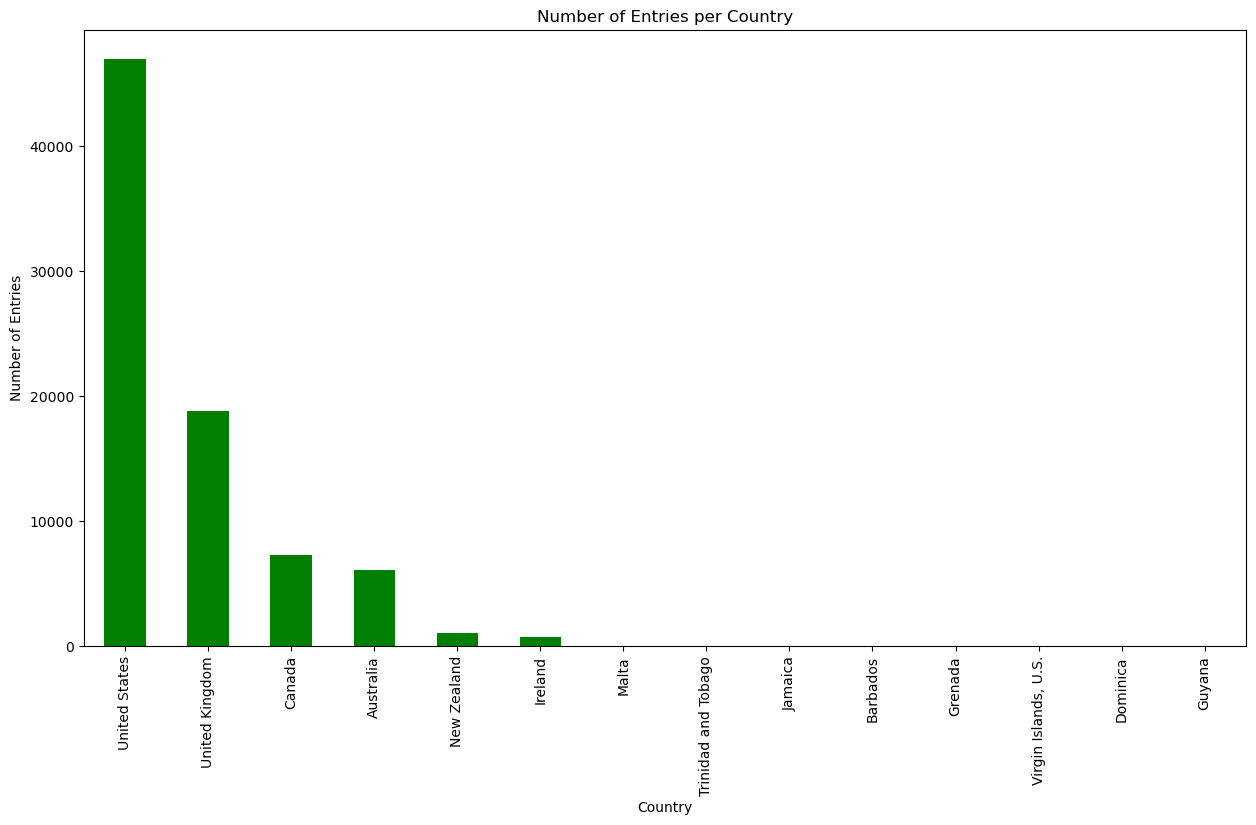

In [8]:
# Calculating the number of entries per country
entries_per_country = df_survey['country_full'].value_counts()

# Plotting the number of entries per country
fig, ax = plt.subplots(figsize=(15, 8))
entries_per_country.plot(kind='bar', ax=ax, color='green')
ax.set_title('Number of Entries per Country')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Entries')
ax.set_xticklabels(entries_per_country.index, rotation=90)

plt.show()

In [9]:
entries_per_country

United States           46921
United Kingdom          18783
Canada                   7228
Australia                6078
New Zealand              1011
Ireland                   673
Malta                      26
Trinidad and Tobago        23
Jamaica                    12
Barbados                    8
Grenada                     6
Virgin Islands, U.S.        3
Dominica                    3
Guyana                      3
Name: country_full, dtype: int64

In [10]:
# Filtering out countries with fewer than 100 entries
df_survey =df_survey[df_survey['country_full'].isin(entries_per_country[entries_per_country >= 100].index)]

# Checking the remaining countries and their entry counts
remaining_entries_per_country = df_survey['country_full'].value_counts()
remaining_entries_per_country/3

United States     15640.333333
United Kingdom     6261.000000
Canada             2409.333333
Australia          2026.000000
New Zealand         337.000000
Ireland             224.333333
Name: country_full, dtype: float64

In [11]:
len(df_survey)/3

26898.0

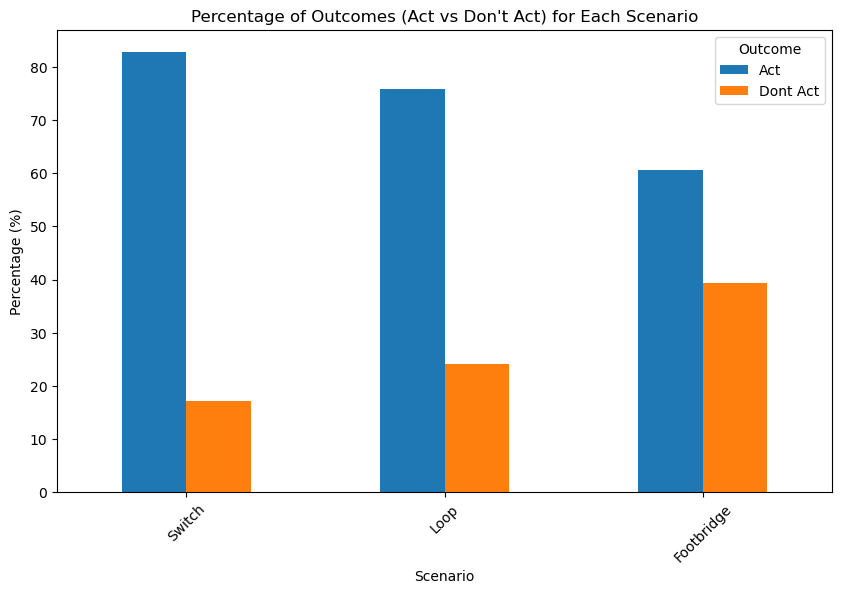

In [12]:
# Creating a DataFrame with the percentage of outcomes for each scenario
scenario_outcome_percentage = df_survey.groupby(['Scenario', 'Outcome']).size().unstack().fillna(0)
scenario_outcome_percentage['Total'] = scenario_outcome_percentage.sum(axis=1)
scenario_outcome_percentage['Act'] = (scenario_outcome_percentage[1] / scenario_outcome_percentage['Total']) * 100
scenario_outcome_percentage['Dont Act'] = (scenario_outcome_percentage[0] / scenario_outcome_percentage['Total']) * 100
# Reordering the scenarios as per the user's request: Switch, Loop, Footbridge
reordered_scenarios = ['Switch', 'Loop', 'Footbridge']
scenario_outcome_percentage_reordered = scenario_outcome_percentage.reindex(reordered_scenarios)

# Plotting the reordered data
fig, ax = plt.subplots(figsize=(10, 6))

scenario_outcome_percentage_reordered[['Act', 'Dont Act']].plot(kind='bar', ax=ax)
ax.set_title('Percentage of Outcomes (Act vs Don\'t Act) for Each Scenario')
ax.set_xlabel('Scenario')
ax.set_ylabel('Percentage (%)')
ax.set_xticklabels(reordered_scenarios, rotation=45)

plt.savefig("plots/survey_answer_distibution")
plt.show()


In [13]:
# Calculating the consistency of answers between countries for each scenario
consistency_data = df_survey.groupby(['country_full', 'Scenario', 'Outcome']).size().unstack().fillna(0)
consistency_data['Total'] = consistency_data.sum(axis=1)
consistency_data['Act_Percentage'] = (consistency_data[1] / consistency_data['Total']) * 100
consistency_data['Dont_Act_Percentage'] = (consistency_data[0] / consistency_data['Total']) * 100
consistency_data = consistency_data.reset_index()

# Pivot table for better visualization and comparison
pivot_consistency = consistency_data.pivot(index='Scenario', columns='country_full', values=['Act_Percentage', 'Dont_Act_Percentage'])

pivot_consistency

Act_Percentage                                                   \
country_full      Australia     Canada    Ireland New Zealand United Kingdom   
Scenario                                                                       
Footbridge        59.433962  58.215179  56.387665   57.057057      60.003198   
Loop              75.061365  74.793729  74.222222   75.443787      74.287534   
Switch            80.069068  82.543641  84.615385   77.941176      81.853096   

                           Dont_Act_Percentage                        \
country_full United States           Australia     Canada    Ireland   
Scenario                                                               
Footbridge       61.414956           40.566038  41.784821  43.612335   
Loop             76.869665           24.938635  25.206271  25.777778   
Switch           83.765234           19.930932  17.456359  15.384615   

                                                       
country_full New Zealand United Kingdom United States  
Scenario                                               
Footbridge     42.942943      39.996802     38.585044  
Loop           24.556213      25.712466     23.130335  
Switch         22.058824      18.146904     16.234766

In [14]:

# Creating a new DataFrame for LaTeX table with sorted values of 'n' (total entries)
sorted_total_entries = pd.Series({
    "United States": 15640, 
    "Australia": 2026, 
    "Canada": 2409, 
    "Ireland": 224, 
    "New Zealand": 337, 
    "United Kingdom": 6261
}).sort_values(ascending=False)

# Creating a new DataFrame for the percentages with the same order as sorted_total_entries
sorted_percentages = pd.DataFrame({
    "Footbridge": [61.41, 59.43, 58.21, 56.39, 57.06, 60.00],
    "Loop": [76.86, 75.06, 74.79, 74.22, 75.44, 74.29],
    "Switch": [83.76, 80.07, 82.54, 84.62, 77.94, 81.85]
}, index=["United States", "Australia", "Canada", "Ireland", "New Zealand", "United Kingdom"])

sorted_percentages = sorted_percentages.reindex(sorted_total_entries.index)
sorted_percentages['n'] = sorted_total_entries
sorted_percentages.reset_index(inplace=True)
sorted_percentages.rename(columns={'index': 'Country'}, inplace=True)

sorted_percentages


,Country,Footbridge,Loop,Switch,n
0,United States,61.41,76.86,83.76,15640
1,United Kingdom,60.00,74.29,81.85,6261
2,Canada,58.21,74.79,82.54,2409
3,Australia,59.43,75.06,80.07,2026
4,New Zealand,57.06,75.44,77.94,337
5,Ireland,56.39,74.22,84.62,224


In [15]:
df_survey.to_csv("data/survey_sample.csv", index = False)